# **Exercise 05 - clustering**
### Laboratory of **Computational Physics**, module B
#### University of **Padua** *AY 2021/2022* 

### Group **02**
#### *Students:* Barone Francesco Pio, Nagaro Quiroz Gianmarco, Ninni Daniele, Valentini Lorenzo

***

In this notebook: data generation of a **nasty dataset**


In [1]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#ff2121', '#ffc421', '#00c94d', '#2185ff', '#b619ff']
plt.rcParams['font.size'] = 12

data_path = 'DATA'

In [2]:
# some test of the functions we use
np.random.poisson(lam=1.0, size=None)
np.random.normal(loc=0.0, scale=1.0, size=None)
np.random.exponential(scale=1.0, size=None)
np.random.triangular(left=1, mode=4, right=10, size=None)

9.534245857438357

In [3]:
xsize = 10000  # size of dataset

M = 1000  # samples to generate for binning
L = 10    # number of bin margins + 1

In [4]:
# setting up the chosen probability functions
prb_functions = [ np.random.poisson, np.random.normal, np.random.normal, np.random.triangular, np.random.gumbel]
prb_args = [ {'lam':3.0}, {'loc':3.0, 'scale': 2}, {'loc':5.0, 'scale': 3}, {'left':1,'mode':5,'right':L-1}, {'loc':3.0, 'scale': 2}]

n_class = len(prb_functions)  # number of classes (probability distributions)

if len(prb_functions) != len(prb_args):
    print('ERROR: prb functions and args do not match')

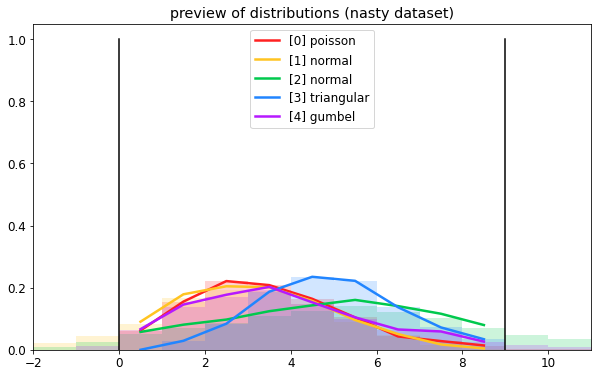

In [5]:
# plot the distributions
plt.figure(figsize=(10, 6))

for lidx in range(n_class):
    
    # generate samples from the probability distribution chosen by the label
    this_samples = prb_functions[lidx]( **(prb_args[lidx]), size=M )

    plt.hist(this_samples, bins=np.arange(-2,L+3), alpha = 0.2, density=True, color=colors[lidx])
    y, x = np.histogram(this_samples, bins=np.arange(L), density = True)
    plt.plot(x[:-1]+0.5, y, color=colors[lidx], linewidth=2.5,label=f'[{lidx}] {str(prb_functions[lidx].__name__)}')

plt.plot([0,0],[0,1], color='k')
plt.plot([L-1,L-1],[0,1], color='k')
plt.legend()
plt.xlim(-2,L+1)
plt.title('preview of distributions (nasty dataset)')
plt.savefig(f'{data_path}/nasty_data_preview.png')

In [6]:
############## DATA GENERATION ##############

# generate bin array, once for all
binL = np.arange(L)
print('bins:', binL)
bin_limit = binL[-1]

# generate the labels
y = np.random.randint(0, high=n_class, size=xsize)
print('labels:',y)

# behaviour: set a limit of replacements
replace_limit = 20
errors = 0

# generate the samples x
x = []
for idx, label in enumerate(y):
    
    # generate samples from the probability distribution chosen by the label
    this_samples = prb_functions[label]( **(prb_args[label]), size=M )
    
    creplace = 0 # count how many times we have replaced values
    
    # check if samples exceed the upper bin limit
    overflow_samples = np.sum((this_samples>bin_limit)|(this_samples<0))
    while overflow_samples != 0:
        # check how many time did you replace the data
        creplace +=1
        if creplace > replace_limit:
            print(f' WARNING: too many replacements for label {label}, check the code')
            errors += 1
            break
        
        # use fancy indexing to replace values
        this_samples[(this_samples>bin_limit)|(this_samples<0)] = prb_functions[label]( **(prb_args[label]), size=overflow_samples )
        
        # check again for overflow
        overflow_samples = np.sum((this_samples>bin_limit)|(this_samples<0))
        
    samples_binned, _ = np.histogram(this_samples, bins=binL)
    x.append(samples_binned/np.sum(samples_binned))
    #print(idx, label, samples_binned/np.sum(samples_binned))
    
x = np.matrix(x)

# print a sample of the dataset
for i in range(min(len(y),10)):
    print(f'[{y[i]}] ->', x[i])

print(f'\n\nThere have been {errors} errors.')
if errors > 0:
    raise 'ERROR'

bins: [0 1 2 3 4 5 6 7 8 9]
labels: [3 3 3 ... 1 0 4]
[3] -> [[0.    0.032 0.094 0.151 0.218 0.217 0.173 0.085 0.03 ]]
[3] -> [[0.    0.019 0.099 0.167 0.212 0.205 0.162 0.097 0.039]]
[3] -> [[0.    0.025 0.095 0.169 0.221 0.219 0.148 0.093 0.03 ]]
[2] -> [[0.051 0.074 0.107 0.142 0.159 0.159 0.126 0.109 0.073]]
[3] -> [[0.    0.031 0.098 0.159 0.23  0.224 0.152 0.083 0.023]]
[4] -> [[0.043 0.139 0.176 0.192 0.154 0.116 0.095 0.051 0.034]]
[3] -> [[0.    0.032 0.096 0.164 0.234 0.193 0.16  0.092 0.029]]
[3] -> [[0.    0.023 0.079 0.145 0.222 0.243 0.153 0.098 0.037]]
[2] -> [[0.046 0.082 0.115 0.148 0.144 0.14  0.13  0.112 0.083]]
[0] -> [[0.041 0.148 0.218 0.239 0.176 0.105 0.043 0.025 0.005]]


There have been 0 errors.


In [7]:
np.savetxt(f'{data_path}/x_distr_nasty.txt', x)
np.savetxt(f'{data_path}/y_distr_nasty.txt', y)

End of file.